#  Credit Score Card                               
### Zong Xinghao 

# 1 Read in the files

In [176]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from sklearn.ensemble              import RandomForestClassifier
from sklearn.ensemble              import RandomForestRegressor
from sklearn.linear_model          import LogisticRegression
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.naive_bayes           import GaussianNB
from sklearn.model_selection       import GridSearchCV
from sklearn.metrics               import confusion_matrix, accuracy_score, roc_auc_score, balanced_accuracy_score, precision_score, f1_score,roc_curve,auc
from sklearn.svm                   import SVC 
import warnings
from scipy import stats
import seaborn
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [177]:
path = os.getcwd() + "\\"
print(path)

C:\Users\xzong\Desktop\MBD\Credit Scoring\


In [178]:
accepts = pd.read_excel('Accepts.xlsx')
rejects = pd.read_excel('Rejects.xlsx')

In [179]:
accepts.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45
0,250263,1,1,11,5,6,7,1,2,0,1,0,NaN,1.438518,-0.259085,1.781040,0.860269,0.513980,0
1,250290,1,2,6,4,5,1,1,2,1,1,0,1.498183,0.204811,0.383312,1.107163,-0.718249,1.796590,0
2,250249,2,3,11,5,7,7,1,2,1,1,0,-0.241731,-0.852651,-0.732430,1.406664,1.122930,-0.768631,0
3,249516,3,3,10,4,2,4,1,2,0,1,168,NaN,-0.676407,-0.057350,0.957412,-1.702482,0.513980,1
4,249827,1,3,5,2,4,4,1,3,0,1,0,NaN,-0.412042,-0.574648,-0.390342,0.910077,-0.768631,0


In [180]:
rejects.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio
0,305932,3,3,14,2,1,5,1,1,1,1,-0.030455,-0.323920,-0.605449,-1.064220,1.028210,-0.768631
1,305764,1,4,7,1,6,4,1,2,1,1,0.715222,5.668368,1.299572,0.807662,1.081778,1.796590
2,305971,1,4,10,4,5,4,1,4,1,3,0.764933,-0.750782,0.434027,-0.390342,-0.969416,1.796590
3,305664,1,5,14,2,2,5,3,3,1,1,-1.347818,-0.852651,-0.490122,-0.989344,1.046303,-0.768631
4,305639,1,4,15,1,5,4,1,3,1,2,1.634890,3.200955,0.561380,0.583036,0.088464,1.796590


# 2 Data Processing 

### Drop the column we can't use

In [181]:
accepts = accepts.drop(["Days_late"], axis=1)

In [182]:
accepts.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45
0,250263,1,1,11,5,6,7,1,2,0,1,NaN,1.438518,-0.259085,1.781040,0.860269,0.513980,0
1,250290,1,2,6,4,5,1,1,2,1,1,1.498183,0.204811,0.383312,1.107163,-0.718249,1.796590,0
2,250249,2,3,11,5,7,7,1,2,1,1,-0.241731,-0.852651,-0.732430,1.406664,1.122930,-0.768631,0
3,249516,3,3,10,4,2,4,1,2,0,1,NaN,-0.676407,-0.057350,0.957412,-1.702482,0.513980,1
4,249827,1,3,5,2,4,4,1,3,0,1,NaN,-0.412042,-0.574648,-0.390342,0.910077,-0.768631,0


### Get an overview of the values in each column

In [183]:
accepts.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45
count,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,5528.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,282247.99760,1.878700,3.49540,9.041400,3.316200,3.97740,4.868300,1.757200,0.552800,1.403200,-0.083256,0.034164,-0.119329,-0.003147,0.100456,0.019662,0.236400
std,15871.15137,1.092385,1.20877,3.723207,1.361618,2.03664,1.378675,0.958927,0.497229,0.655342,1.016782,1.050937,1.020399,1.019526,0.971090,1.015233,0.424892
min,249516.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,-6.033156,-1.117017,-0.984880,-1.588346,-2.859551,-0.768631,0.000000
25%,269470.25000,1.000000,3.00000,7.000000,2.000000,2.00000,4.000000,1.000000,0.000000,1.000000,-0.875556,-0.641159,-0.536330,-0.914469,-0.614537,-0.768631,0.000000
50%,284845.00000,1.000000,3.00000,10.000000,4.000000,4.00000,5.000000,1.000000,1.000000,1.000000,-0.192019,-0.323920,-0.359389,-0.165717,0.414129,-0.768631,0.000000
75%,296044.75000,3.000000,5.00000,11.000000,4.000000,6.00000,5.000000,3.000000,1.000000,2.000000,0.690366,0.381055,0.056479,0.882537,0.965099,0.513980,0.000000
max,305957.00000,5.000000,6.00000,16.000000,6.000000,7.00000,7.000000,3.000000,1.000000,3.000000,2.467563,5.844611,43.842002,2.005666,9.387304,1.796590,1.000000


In [184]:
rejects.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,2914.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,315743.499200,1.863600,3.514200,8.558800,3.209800,3.633600,4.698000,1.871000,0.582800,1.2822,0.031224,-0.043453,0.097306,-0.058585,-0.110717,0.143562
std,5778.293646,1.082603,1.246318,3.937314,1.316864,1.972442,1.196613,0.978647,0.493146,0.6380,0.975742,0.952493,0.972333,0.976694,1.026137,1.037191
min,286878.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0000,-2.714893,-1.117017,-0.703127,-1.588346,-2.869484,-0.768631
25%,310660.750000,1.000000,3.000000,5.000000,2.000000,2.000000,4.000000,1.000000,0.000000,1.0000,-0.751277,-0.676407,-0.402215,-0.914469,-0.923333,-0.768631
50%,315932.000000,1.000000,4.000000,10.000000,4.000000,3.000000,5.000000,1.000000,1.000000,1.0000,-0.030455,-0.323920,-0.161035,-0.165717,0.081724,-0.768631
75%,320834.250000,3.000000,5.000000,11.000000,4.000000,5.000000,5.000000,3.000000,1.000000,1.0000,0.777361,0.292933,0.290897,0.583036,0.813654,0.513980
max,325624.000000,5.000000,5.000000,15.000000,5.000000,7.000000,7.000000,3.000000,1.000000,3.0000,2.442707,5.844611,29.318205,2.080541,2.199966,1.796590


### We have 4478 and 2086 missing values in FICO_score of accepts and rejects respectively. 

### Check types of each column

In [185]:
accepts.dtypes

ID                       int64
V1                       int64
V2                       int64
V3                       int64
V4                       int64
V5                       int64
V6                       int64
V7                       int64
V8                      object
Has_FICO                 int64
Business_channel         int64
FICO_Score             float64
Loan_amount            float64
Monthly_income         float64
Age                    float64
Gearing_coefficient    float64
Max_gearing_ratio      float64
Default_45               int64
dtype: object

In [186]:
rejects.dtypes

ID                       int64
V1                       int64
V2                       int64
V3                       int64
V4                       int64
V5                       int64
V6                       int64
V7                       int64
V8                      object
Has_FICO                 int64
Business_channel         int64
FICO_Score             float64
Loan_amount            float64
Monthly_income         float64
Age                    float64
Gearing_coefficient    float64
Max_gearing_ratio      float64
dtype: object

### The type of V8 is object, whcih means it may has different types of value. we will use unique to find out and handle it

In [187]:
accepts.V8.unique()

array(['2', '3', '4', '1', '>4'], dtype=object)

In [188]:
rejects.V8.unique()

array(['1', '2', '4', '3', '>4'], dtype=object)

### To unify the type of V8, we convert '>4' to 6

In [189]:
accepts.loc[accepts['V8'] == '>4','V8'] = 6

In [190]:
rejects.loc[rejects['V8'] == '>4','V8'] = 6

### Based on the resluts, we have a large amount of missing values of  "FICO_Score". We will use random forest to predict the missing value and then complete them.

In [191]:
# Define the function to implement random forest model to predict the missing values
def set_missing(df):
    # Select the variables we can use to in the modeling 
    process_df = df.iloc[:,[11,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16]]
    # split the variables without missing values
    known = process_df[process_df.FICO_Score.notnull()]
    unknown = process_df[process_df.FICO_Score.isnull()]
    # Define the predictors
    X = known.iloc[:, 1:]
    # Defint the target variable
    y = known.iloc[:, 0]
    # Define Random forest model and fit it
    rfr = RandomForestRegressor(random_state=0, 
    n_estimators=200,max_depth=3,n_jobs=-1)
    rfr.fit(X,y)
    # Make predictions
    predicted = rfr.predict(unknown.iloc[:, 1:])
    print(predicted)
    # Fill missing values with predictions
    df.loc[(df.FICO_Score.isnull()), 'FICO_Score'] = predicted.round(0)
    #df.FICO_Score = df.FICO_Score.astype(int)
    return df

In [192]:
accepts = set_missing(accepts)

[ 0.49717188  0.16386461 -0.44126474 ... -0.29718478 -0.99994989
  0.19557857]


In [193]:
rejects = set_missing(rejects)

[ 0.71967433  0.65958485  0.09526396 ... -0.78055125  0.05323299
  0.03826001]


### Remove unrelevant columns for further data processing

In [194]:
process_ac = accepts.drop(['ID','Default_45'],axis = 1)

In [195]:
process_re = rejects.drop(['ID'],axis = 1)

In [196]:
#Convert the type of process_ac into flocat
process_ac = pd.DataFrame(process_ac,dtype = "float")

In [197]:
#Convert the type of process_re into flocat
process_re = pd.DataFrame(process_re,dtype = "float")

In [198]:
process_ac.head()

,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio
0,1.0,1.0,11.0,5.0,6.0,7.0,1.0,2.0,0.0,1.0,0.000000,1.438518,-0.259085,1.781040,0.860269,0.513980
1,1.0,2.0,6.0,4.0,5.0,1.0,1.0,2.0,1.0,1.0,1.498183,0.204811,0.383312,1.107163,-0.718249,1.796590
2,2.0,3.0,11.0,5.0,7.0,7.0,1.0,2.0,1.0,1.0,-0.241731,-0.852651,-0.732430,1.406664,1.122930,-0.768631
3,3.0,3.0,10.0,4.0,2.0,4.0,1.0,2.0,0.0,1.0,0.000000,-0.676407,-0.057350,0.957412,-1.702482,0.513980
4,1.0,3.0,5.0,2.0,4.0,4.0,1.0,3.0,0.0,1.0,-0.000000,-0.412042,-0.574648,-0.390342,0.910077,-0.768631


In [199]:
process_re.head()

,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio
0,3.0,3.0,14.0,2.0,1.0,5.0,1.0,1.0,1.0,1.0,-0.030455,-0.323920,-0.605449,-1.064220,1.028210,-0.768631
1,1.0,4.0,7.0,1.0,6.0,4.0,1.0,2.0,1.0,1.0,0.715222,5.668368,1.299572,0.807662,1.081778,1.796590
2,1.0,4.0,10.0,4.0,5.0,4.0,1.0,4.0,1.0,3.0,0.764933,-0.750782,0.434027,-0.390342,-0.969416,1.796590
3,1.0,5.0,14.0,2.0,2.0,5.0,3.0,3.0,1.0,1.0,-1.347818,-0.852651,-0.490122,-0.989344,1.046303,-0.768631
4,1.0,4.0,15.0,1.0,5.0,4.0,1.0,3.0,1.0,2.0,1.634890,3.200955,0.561380,0.583036,0.088464,1.796590


### Plot boxplots to check outliers

V1


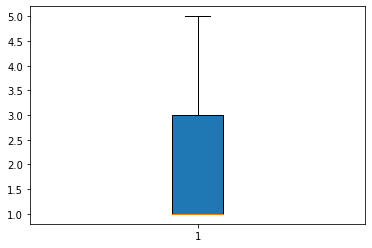

V2


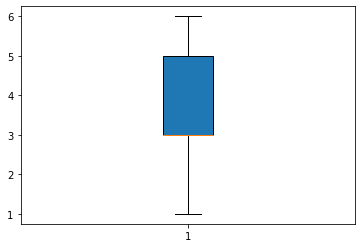

V3


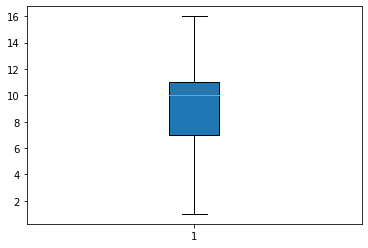

V4


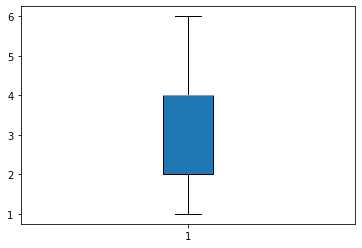

V5


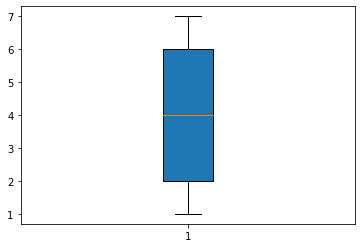

V6


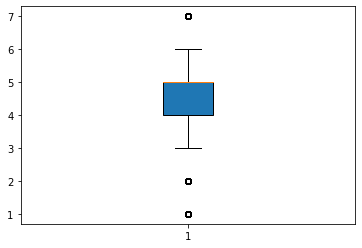

V7


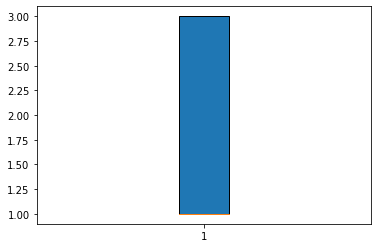

V8


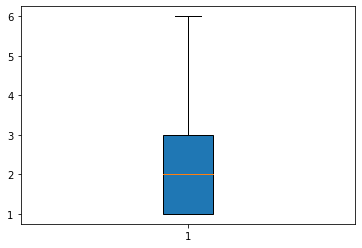

Has_FICO


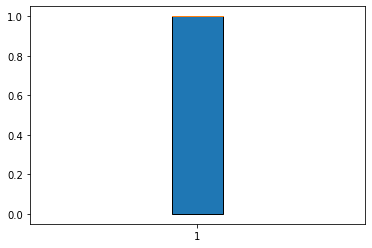

Business_channel


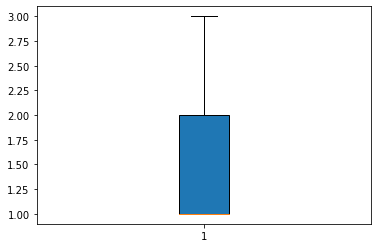

FICO_Score


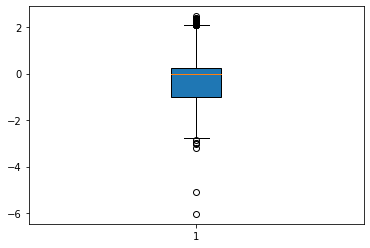

Loan_amount


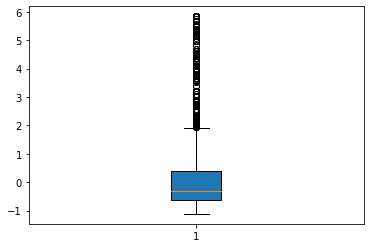

Monthly_income


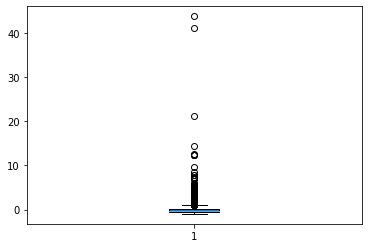

Age


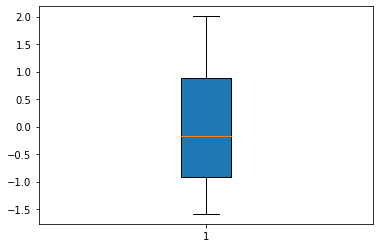

Gearing_coefficient


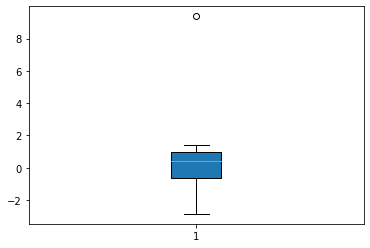

Max_gearing_ratio


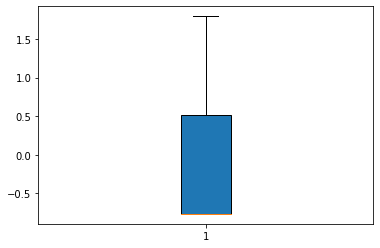

In [200]:
for column in process_ac.columns:
    print(column)
    fig,axes=plt.subplots()
    axes.boxplot(process_ac[column],patch_artist=True) 
    plt.show() 

V1


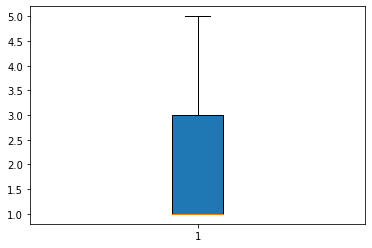

V2


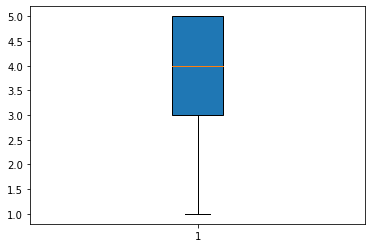

V3


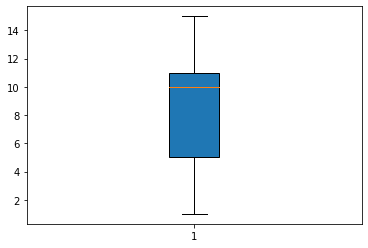

V4


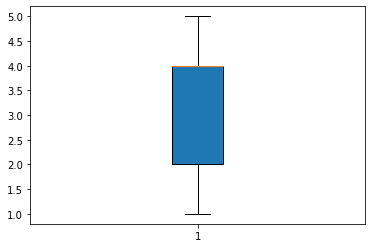

V5


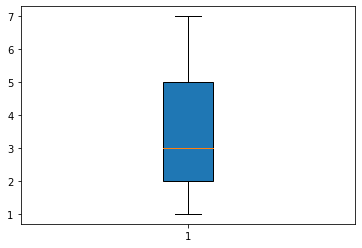

V6


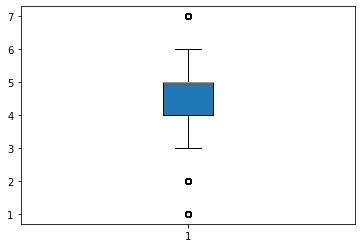

V7


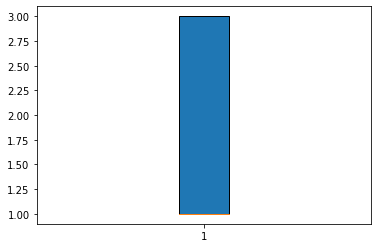

V8


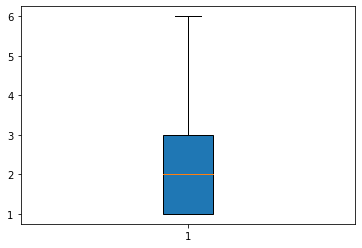

Has_FICO


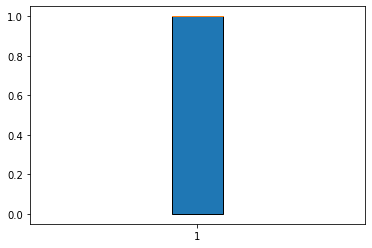

Business_channel


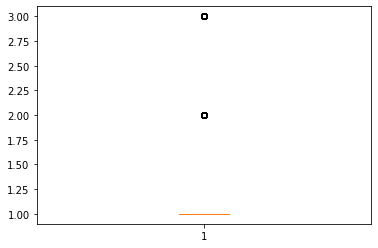

FICO_Score


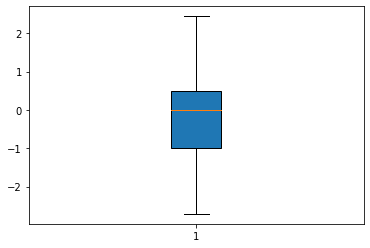

Loan_amount


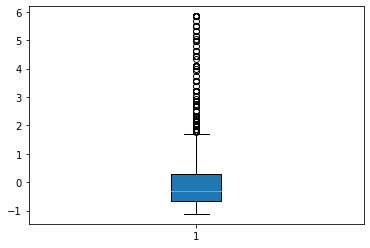

Monthly_income


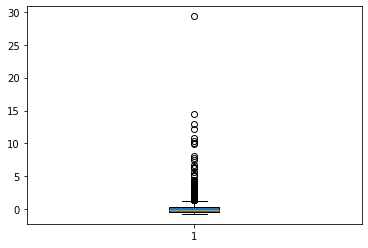

Age


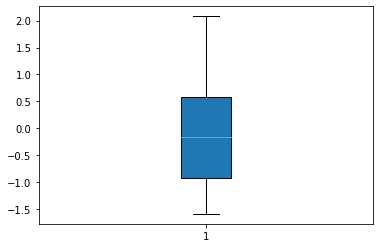

Gearing_coefficient


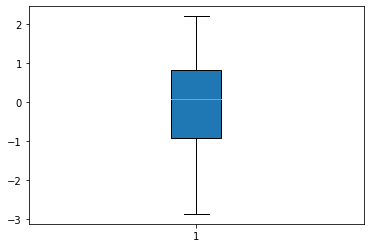

Max_gearing_ratio


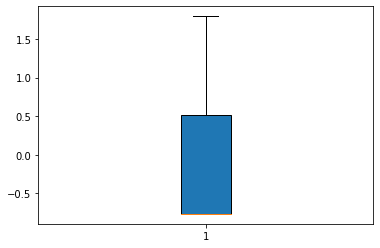

In [201]:
for column in process_re.columns:
    print(column)
    fig,axes=plt.subplots()
    axes.boxplot(process_re[column],patch_artist=True) 
    plt.show() 

### From the results above, we can find there some outliers in some columns such as FICO_Score. To reduce the effect of oultiers, we will define a function to remove values larger or smaller than a certain range. First we set  3 times  the difference between the 25% percentile and 75% percentile as an interval. Values beyond the range will be replaced with the cooresponding lower limit or upper limit.

In [202]:
# Write a function to remove outliers using IQR
def outliers_IQR(data, col):
    #Get the lower quartial
    lower_quartile = data[col].quantile(0.25)
    #Get the higher quartial
    upper_quartile = data[col].quantile(0.75)
    #Define the interval
    IQR = upper_quartile - lower_quartile
    #Define the range 
    outlier_thresh = 3 * IQR
    #Select value within the range
    data_outlier = data[data[col].between((lower_quartile - outlier_thresh), (upper_quartile + outlier_thresh))]
    #Replace the value of outliers with the cooresponding lower limit or upper limits.
    data.loc[data[col] < lower_quartile - outlier_thresh,col] = min(data_outlier[col])
    data.loc[data[col] > upper_quartile + outlier_thresh,col] = max(data_outlier[col])                                                               
    return data

### It's reasonable to have extreme values of "Loan_amount", "Monthly_income",  therefore we didn't apply the function on them. But we obtained a better prediction performance if we also reduce outliers of those 2 columns.

In [203]:
for column in process_ac.columns:
#    if column in ["Loan_amount", "Monthly_income"]:
#        continue
    process_ac = outliers_IQR(process_ac, column)
    process_re = outliers_IQR(process_re, column)

V1


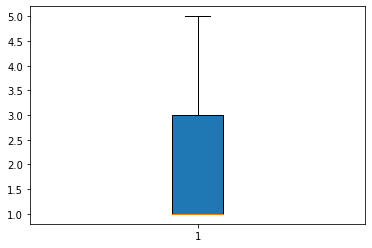

V2


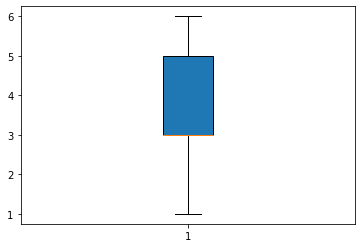

V3


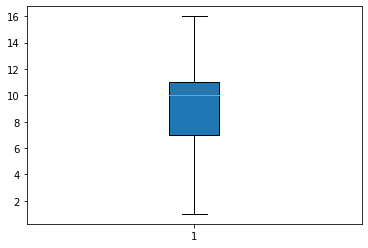

V4


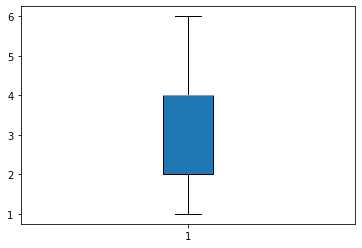

V5


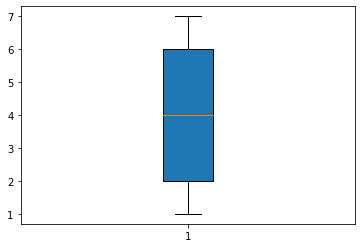

V6


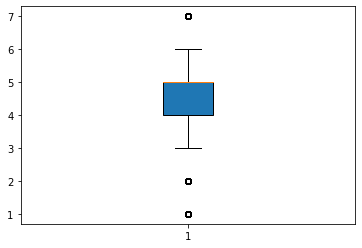

V7


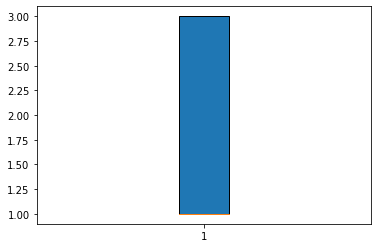

V8


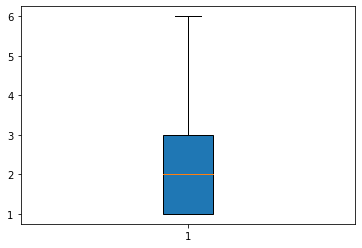

Has_FICO


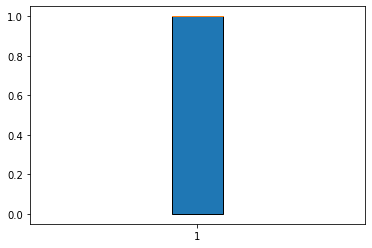

Business_channel


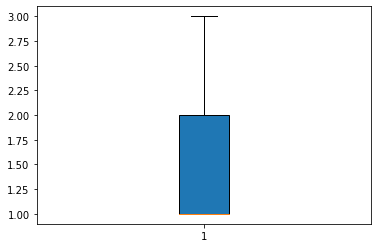

FICO_Score


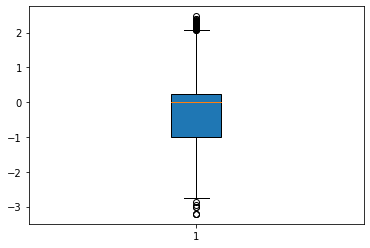

Loan_amount


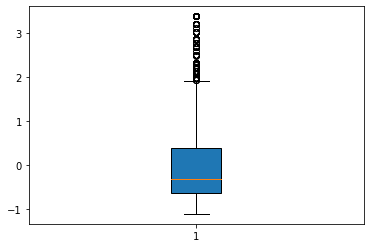

Monthly_income


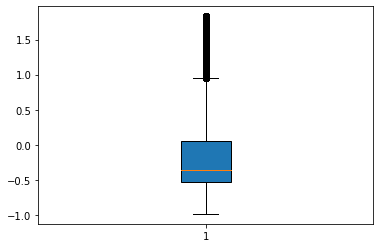

Age


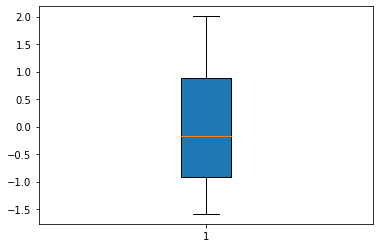

Gearing_coefficient


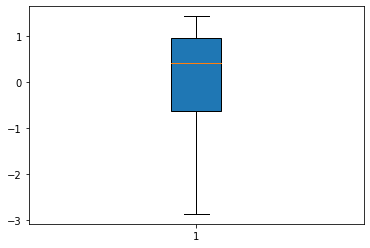

Max_gearing_ratio


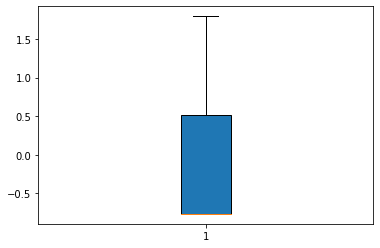

In [204]:
for column in process_ac.columns:
    print(column)
    fig,axes=plt.subplots()
    axes.boxplot(process_ac[column],patch_artist=True) 
    plt.show() 

V1


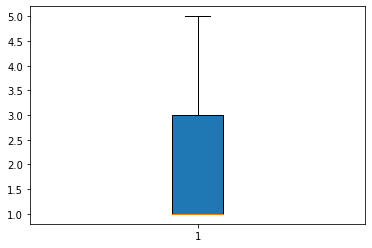

V2


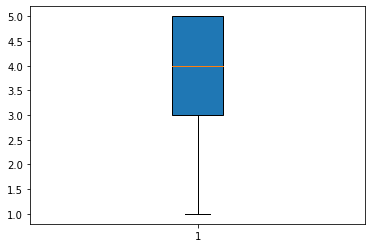

V3


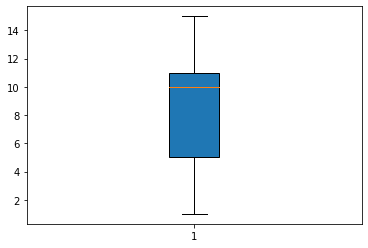

V4


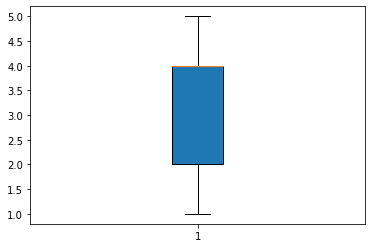

V5


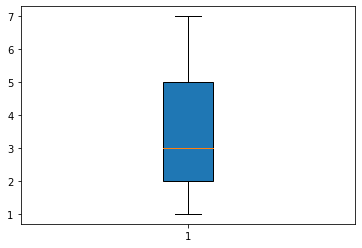

V6


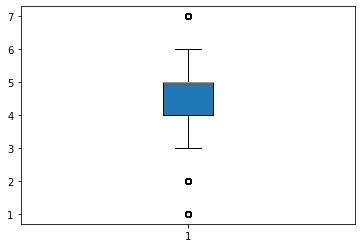

V7


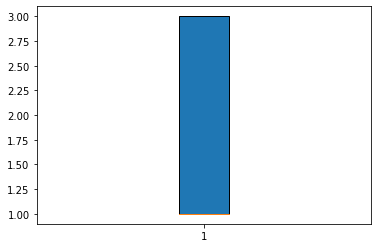

V8


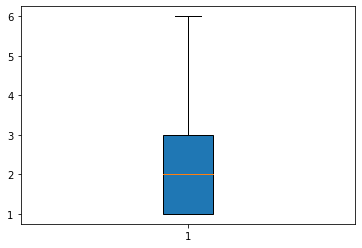

Has_FICO


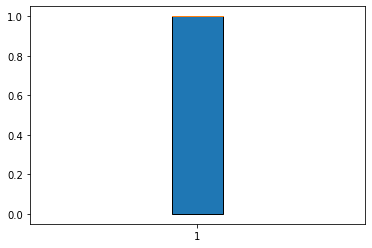

Business_channel


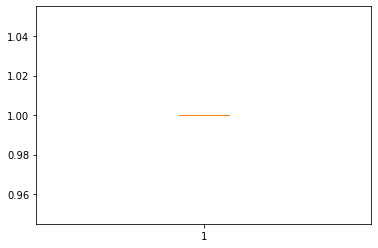

FICO_Score


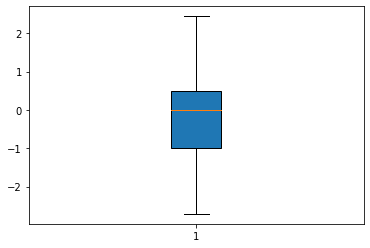

Loan_amount


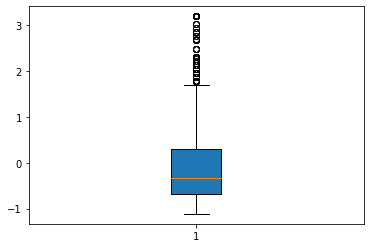

Monthly_income


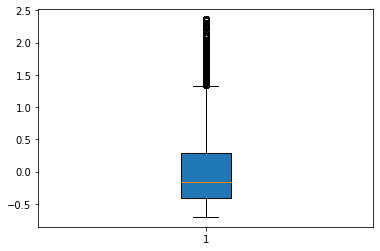

Age


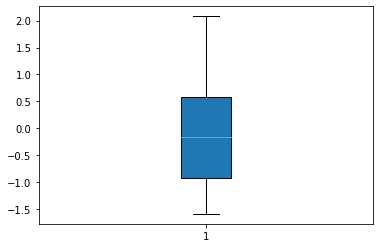

Gearing_coefficient


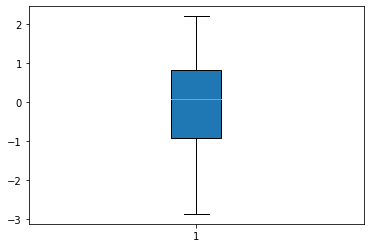

Max_gearing_ratio


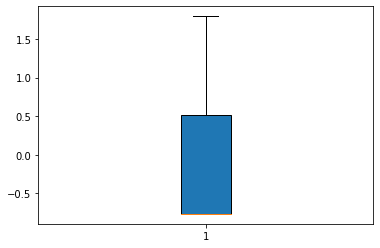

In [205]:
for column in process_re.columns:
    print(column)
    fig,axes=plt.subplots()
    axes.boxplot(process_re[column],patch_artist=True) 
    plt.show()

### Explore the variables

### In this secction, we will plot hist gram of each variable to get an overview of the distribution

V1


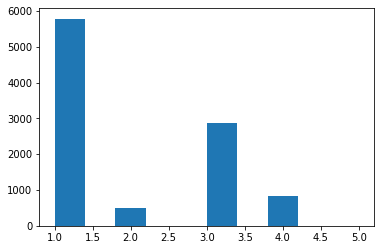

V2


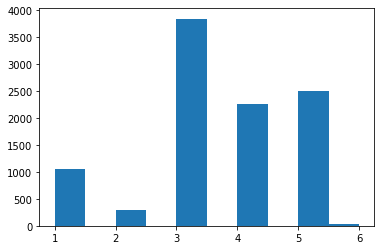

V3


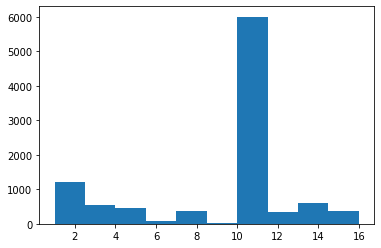

V4


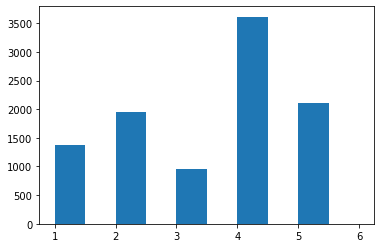

V5


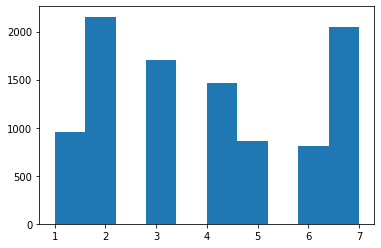

V6


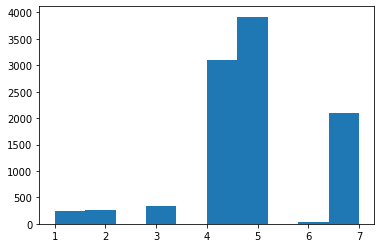

V7


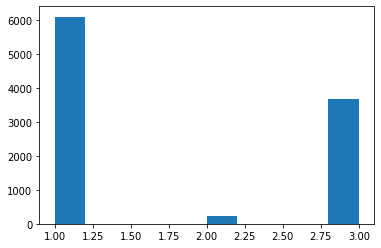

V8


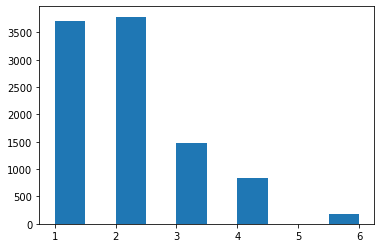

Has_FICO


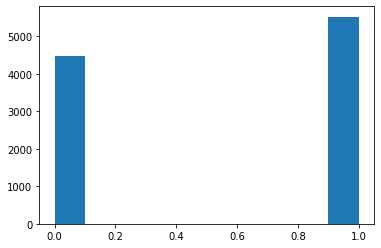

Business_channel


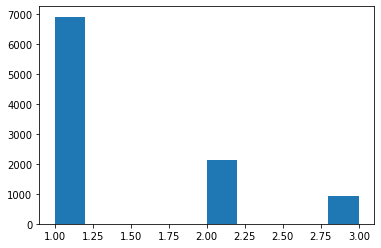

FICO_Score


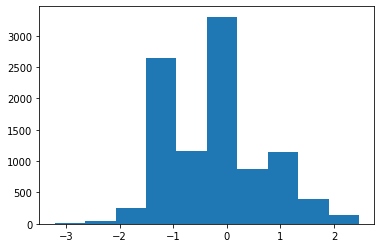

Loan_amount


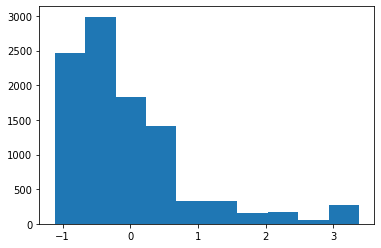

Monthly_income


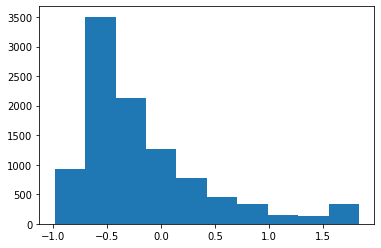

Age


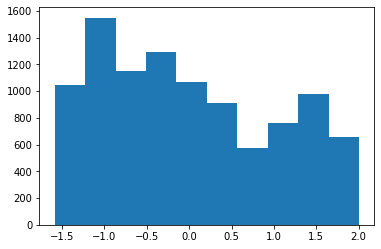

Gearing_coefficient


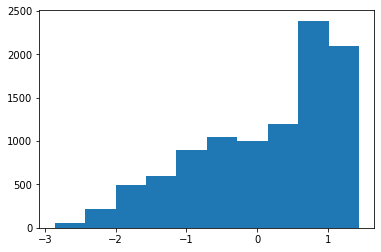

Max_gearing_ratio


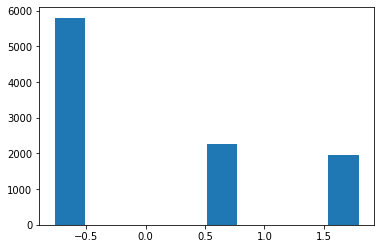

In [206]:
for column in process_ac.columns:
    print(column)
    fig,axes=plt.subplots()
    axes.hist(process_ac[column]) 
    plt.show()

V1


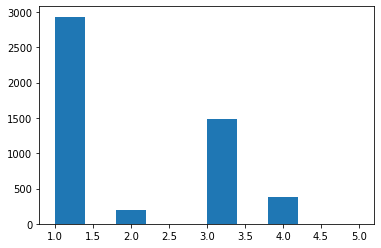

V2


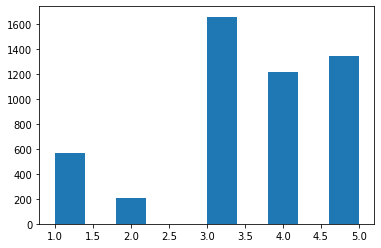

V3


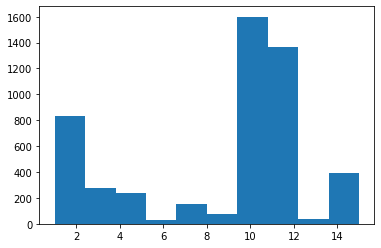

V4


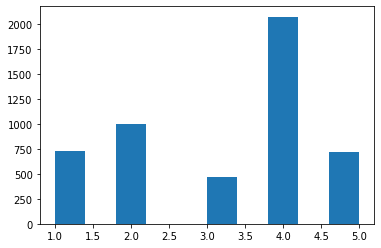

V5


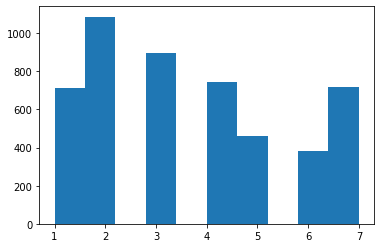

V6


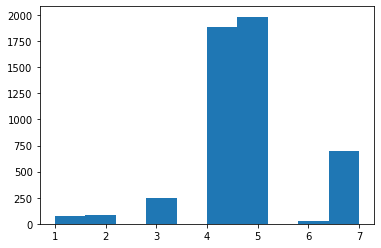

V7


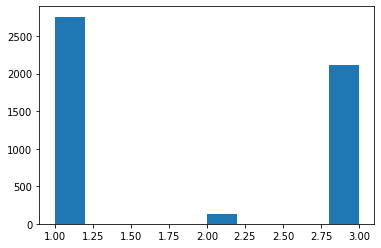

V8


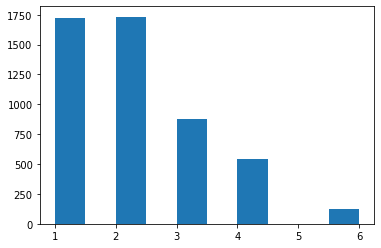

Has_FICO


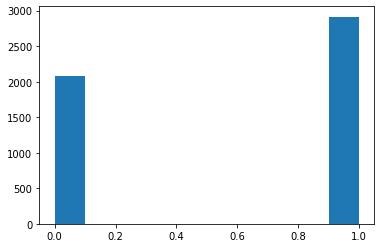

Business_channel


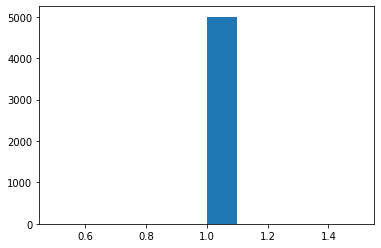

FICO_Score


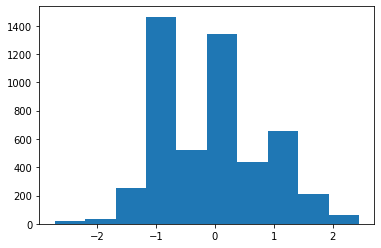

Loan_amount


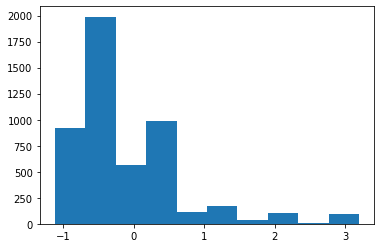

Monthly_income


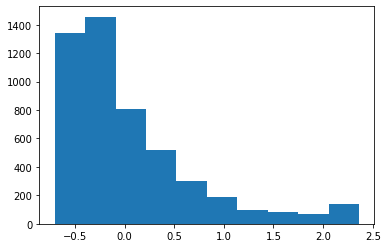

Age


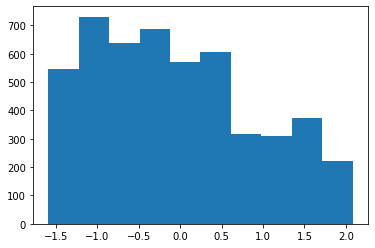

Gearing_coefficient


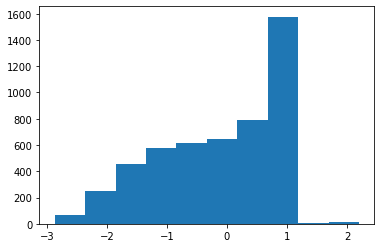

Max_gearing_ratio


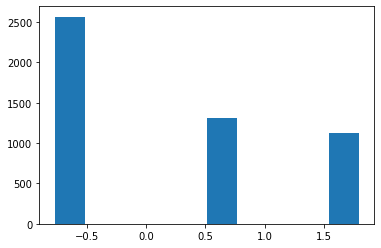

In [207]:
for column in process_re.columns:
    print(column)
    fig,axes=plt.subplots()
    axes.hist(process_re[column]) 
    plt.show() 

# 3 Modeling

### First, we define a function to create bins for each variable, then caculate woe and iv. In this function, for the variables which can be cut based on quantities, we will use a while loop to find the optimal solution. For the variables which can only be cut by values, we will split them into 5 cuts based on value.

In [208]:
#Reference:Zhihu. 2019. Score Card. [ONLINE] Available at: https://www.zhihu.com/topic/19712111/intro  
def mono_bin(Y, X, n = 20):
    r = 0
    #Get the amount of good customers 
    good=Y.sum()
    #Get the amount of bad customers 
    bad=Y.count()-good
    #Use a while loop to find the optimal solution to bin each variable.
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n)})
        #For the variables which can not be bined by quantities, we will cut them into 5 cuts based on value.
        except:
            d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.cut(X,5)})
            d2 = d1.groupby('Bucket', as_index = True)
            break
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    #Calculate woe
    d3['woe']=np.log((d3['rate']/(1-d3['rate']))/(good/bad))
    d3['goodattribute']=d3['sum']/good
    d3['badattribute']=(d3['total']-d3['sum'])/bad
    #Calculate information value
    iv=((d3['goodattribute']-d3['badattribute'])*d3['woe']).sum()
    d4 = (d3.sort_index(by = 'min')).reset_index(drop=True)
    print("=" * 60)
    print(d4)
    #Store cuts solutions
    cut=[]
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua=X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe=list(d4['woe'].round(3))
    #Remove the duplicates in the cuts solution and sort them 
    cut = sorted(list(set(cut)))
    return d4,iv,cut,woe

In [209]:
Y = accepts.Default_45

In [210]:
#Define 4 lists to store the statistics, information value, cut solution, and woe of each variables
statics = []
iv = []
cut = []
woe =[]

### Use a for loop to bin each variable, then print out the cuts and corresponding statistic information

In [211]:
for column in process_ac.columns:
    print("\n" + column)
    z1,z2,z3,z4 = mono_bin(Y,process_ac[column],n = 20)
    statics.append(z1)
    iv.append(z2)
    cut.append(z3)
    woe.append(z4)


V1
   min  max   sum  total      rate       woe  goodattribute  badattribute
0  1.0  1.0  1055   5783  0.182431 -0.327443       0.446277      0.619172
1  2.0  2.0    87    502  0.173307 -0.389852       0.036802      0.054348
2  3.0  3.0  1011   2868  0.352510  0.564496       0.427665      0.243190
3  4.0  4.0   208    839  0.247914  0.062751       0.087986      0.082635
4  5.0  5.0     3      8  0.375000  0.661693       0.001269      0.000655

V2
   min  max  sum  total      rate       woe  goodattribute  badattribute
0  1.0  2.0  211   1351  0.156181 -0.514407       0.089255      0.149293
1  3.0  3.0  984   3846  0.255850  0.104869       0.416244      0.374804
2  4.0  4.0  426   2271  0.187583 -0.293276       0.180203      0.241619
3  5.0  5.0  740   2504  0.295527  0.303830       0.313029      0.231011
4  6.0  6.0    3     28  0.107143 -0.947745       0.001269      0.003274

V3
    min   max  sum  total      rate       woe  goodattribute  badattribute
0   1.0   4.0  525   1961  0.26

### Check how relevant each variable is 

In [212]:
process_ac_heat = process_ac.copy()

In [213]:
process_ac_heat['target'] = Y

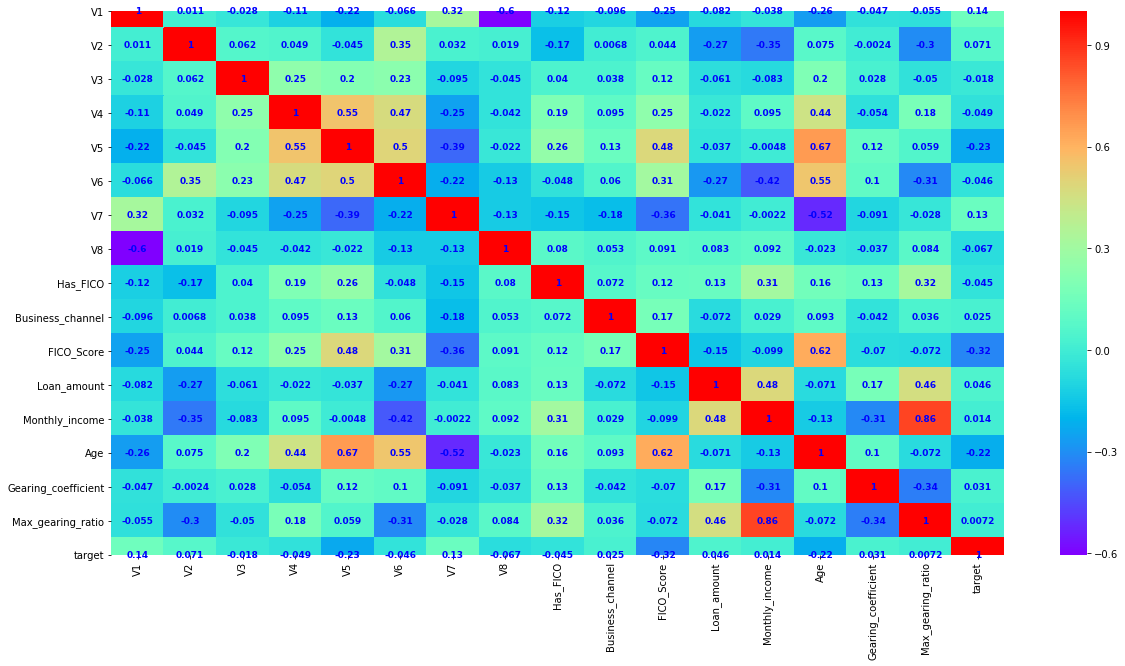

In [214]:
corr = process_ac_heat.corr() #Calculate the correlation coefficient of each variable
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1, 1, 1)
seaborn.heatmap(corr, annot=True, cmap='rainbow', ax=ax1, annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})
plt.show()

### Check information value of each variable

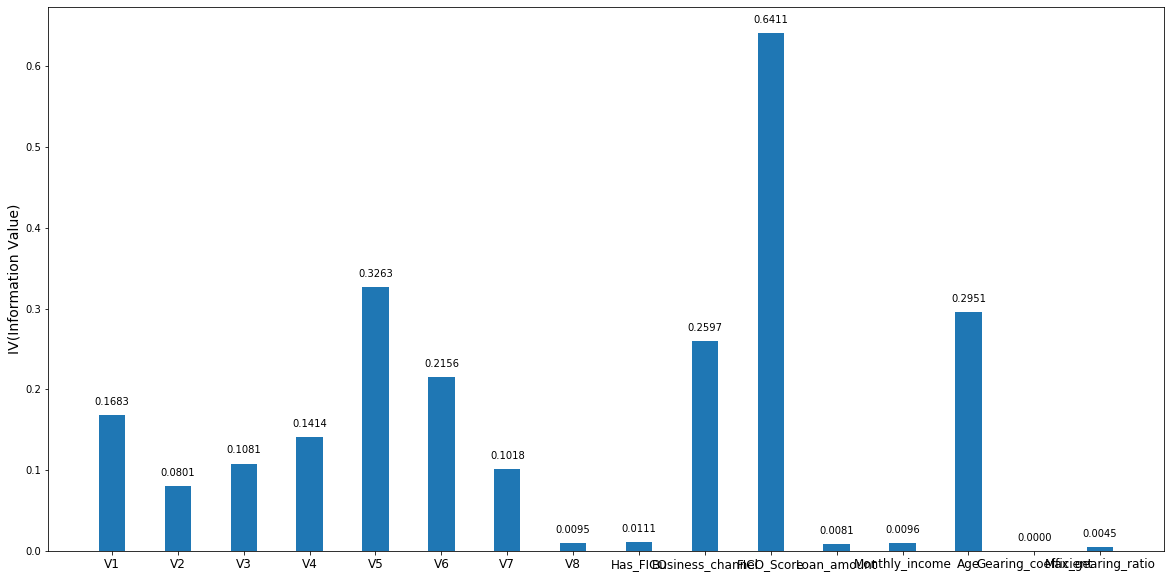

In [215]:
ivlist=iv# information values 
index=process_ac.columns
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index))+1
ax1.bar(x, ivlist, width=0.4)
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=14)
for a, b in zip(x, ivlist):
    plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

### Based on the heatmap and the infotmaiton value charts, we decide to to remove the following variables when we build the model.

In [217]:
remove = ['Has_FICO','Loan_amount','Monthly_income','Gearing_coefficient','Max_gearing_ratio','V8']

### Define function to transform each variable into woe embedding variables

In [218]:
#We set the variable column, cut solution, and woe as inputs.
def replace_woe(series, cut, woe):
    list = []
    i = 0
    while i<len(series):
        value=series[i]
        j=len(cut) - 2
        m=len(cut) - 2
        while j >= 0:
            if value>=cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

### transform each variable into woe embedding variables in a for loop

In [219]:
#Define a dataframe to store the woe embedding of each variable.
data_ac = pd.DataFrame()
#loop through each variable to get the woe embedding 
for column in process_ac.columns:
    i = 0
    data_ac[column] = pd.Series(replace_woe(process_ac[column], cut[i], woe[i]))
    i = i+1

In [220]:
data_ac.head()

,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio
0,-0.390,-0.390,0.662,0.662,0.662,0.662,-0.39,0.564,-0.327,-0.39,-0.327,-0.390,-0.327,-0.390,-0.327,-0.327
1,-0.390,0.564,0.662,0.662,0.662,-0.390,-0.39,0.564,-0.390,-0.39,-0.390,-0.327,-0.327,-0.390,-0.327,-0.390
2,0.564,0.063,0.662,0.662,0.662,0.662,-0.39,0.564,-0.390,-0.39,-0.327,-0.327,-0.327,-0.390,-0.390,-0.327
3,0.063,0.063,0.662,0.662,0.564,0.662,-0.39,0.564,-0.327,-0.39,-0.327,-0.327,-0.327,-0.327,-0.327,-0.327
4,-0.390,0.063,0.662,0.564,0.662,0.662,-0.39,0.063,-0.327,-0.39,-0.327,-0.327,-0.327,-0.327,-0.327,-0.327


### Split the accepts set into training set, and test set. Meanwhile we will use a 3 folds cross validation in the modeling part

In [222]:
X = data_ac
X = X.drop(remove,axis = 1)
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify = Y)

### Check how many bad customer are in the training set

In [223]:
Y_train.sum()

1655

### In this section, we will define several models and a grid of hyper parameters. Then we will train each model using the hyper parameter gird and select the best one.
### After the training and prediction of each model, we will print out the performance in terms of AUC, accuracy, precision and f1 score for each model.
### In the end, we will plot a probability hist gram. So you can find the distribution of probabilities of each model.

logistic 	 AUC: 0.721575010819919 
Accuracy: 0.6616666666666666 
Precision: 0.3813953488372093 
 
F1: 0.4922461230615308 
 {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}
          pred:yes  pred:no
true:yes      1493      798
true:no        217      492 

knn 	 AUC: 0.6761452030050747 
Accuracy: 0.7563333333333333 
Precision: 0.46686746987951805 
 
F1: 0.29779058597502406 
 {'leaf_size': 2, 'n_neighbors': 15, 'weights': 'distance'}
          pred:yes  pred:no
true:yes      2114      177
true:no        554      155 

lda_svd 	 AUC: 0.7164091536206865 
Accuracy: 0.7673333333333333 
Precision: 0.5504587155963303 
 
F1: 0.1466992665036675 
 {'solver': 'svd'}
          pred:yes  pred:no
true:yes      2242       49
true:no        649       60 

randomForest 	 AUC: 0.7588767969838437 
Accuracy: 0.633 
Precision: 0.37139107611548555 
 
F1: 0.5069413345275414 
 {'class_weight': 'balanced', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 600}
   

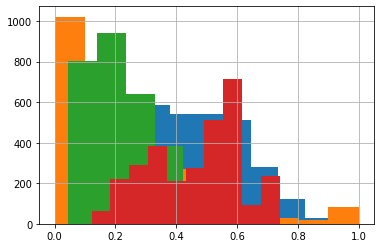

In [224]:
svm          = SVC()
logistic     = LogisticRegression()
randomForest = RandomForestClassifier()
knn          = KNeighborsClassifier()
lda          = LinearDiscriminantAnalysis()

models = {
          "logistic"     :logistic,
          "knn"          :knn,
          #"svm"      : svm,
          "lda_svd"      : lda,
          "randomForest" :randomForest
         }
#Grid Values to loop through
grid_values = {
    "logistic":{"solver":["lbfgs", "newton-cg", "sag", "saga"],'penalty': ['l2'],'C':[0.1, 1, 5, 10, 0.01], 
                "max_iter":[100, 200], "class_weight":[None, "balanced"]},
    "randomForest":{"max_depth":[3,4], "n_estimators":[600, 250], "class_weight":["balanced"], 
                    "max_features":["auto","sqrt", "log2"]},
    "knn":{"n_neighbors":[15,3,5,7,9,10,12], "weights":["distance"], "leaf_size":[2,3]},
    "svm" : {'C': [1], 'gamma': [0.1],'kernel': ['rbf']},
    "lda_svd":{"solver":["svd"]}
}
overview = pd.DataFrame()
ing_pred = pd.DataFrame()

for model in models:
    grid_clf_acc = GridSearchCV(models[model], cv=3, param_grid = grid_values[model], scoring = 'average_precision')
    grid_clf_acc.fit(X_train, Y_train)

    y_pred = grid_clf_acc.predict(x_test)
    probabilities = pd.DataFrame(grid_clf_acc.predict_proba(x_test))[1]
    auc           = roc_auc_score(np.array(y_test),np.array(probabilities))
    acc           = accuracy_score(y_test,y_pred)
    precision     = precision_score(y_test,y_pred)
    f1            = f1_score(y_test,y_pred)
    
    print(model, "\t", "AUC:", auc, "\nAccuracy:", acc, "\nPrecision:", precision,"\n" ,"\nF1:", f1,"\n",grid_clf_acc.best_params_)

    overview[model] = [auc, acc, grid_clf_acc.best_params_]
    
    cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred), 
    index=['true:yes', 'true:no'], 
    columns=['pred:yes', 'pred:no'])

    print(cmtx, "\n")
    probabilities.hist()
    
overview.index = ["AUC", "Accuracy", "best params"]

### We also train the model using logistic regression from the satsmodels package.

In [225]:
import statsmodels
from statsmodels.api import Logit

In [226]:
Y=Y_train
X=X_train
X1= statsmodels.tools.tools.add_constant(X)
logit=Logit(Y,X1)
result=logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.508406
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Default_45   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6989
Method:                           MLE   Df Model:                           10
Date:                Sun, 10 May 2020   Pseudo R-squ.:                 0.07043
Time:                        23:07:20   Log-Likelihood:                -3558.8
converged:                       True   LL-Null:                       -3828.5
Covariance Type:            nonrobust   LLR p-value:                1.731e-109
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.3522      0.486      4.844      0.000       1.400       3.304
V1         

In [227]:
from sklearn.metrics import auc

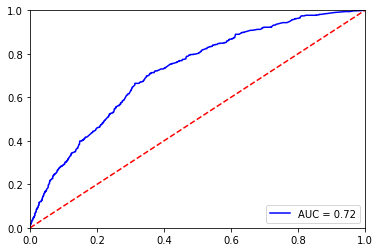

In [228]:
Y_test = y_test
X_test = x_test
X3 = statsmodels.tools.tools.add_constant(X_test)
resu = result.predict(X3)#make predicitons
fpr, tpr, threshold = roc_curve(Y_test, resu)
rocauc = auc(np.array(fpr), np.array(tpr))#calculate AUC
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

## Include Rejects Inference 

### To include the rejects into our training set, we will first transform each variable into woe embedding using the cuts and woe value of the accepts data set.

In [229]:
data_re = pd.DataFrame()
for column in process_re.columns:
    i = 0
    data_re[column] = pd.Series(replace_woe(process_re[column], cut[i], woe[i]))
    i = i+1

In [230]:
data_re.head()

,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio
0,0.063,0.063,0.662,0.564,-0.390,0.662,-0.390,-0.390,-0.39,-0.39,-0.327,-0.327,-0.327,-0.327,-0.390,-0.327
1,-0.390,0.662,0.662,-0.390,0.662,0.662,-0.390,0.564,-0.39,-0.39,-0.327,0.063,-0.390,-0.327,-0.390,-0.390
2,-0.390,0.662,0.662,0.662,0.662,0.662,-0.390,0.662,-0.39,-0.39,-0.327,-0.327,-0.327,-0.327,-0.327,-0.390
3,-0.390,0.662,0.662,0.564,0.564,0.662,0.063,0.063,-0.39,-0.39,-0.327,-0.327,-0.327,-0.327,-0.390,-0.327
4,-0.390,0.662,0.662,-0.390,0.662,0.662,-0.390,0.063,-0.39,-0.39,-0.390,0.063,-0.327,-0.327,-0.327,-0.390


### Based on the performance of each model, we will select Random Forest to make predictions on the rejects data set first.

In [231]:
data_re = data_re.drop(remove,axis = 1)

### Since random forest is the last model in our model loop section, we can directly use the trained model to make predicitons

In [232]:
probabilities = pd.DataFrame(grid_clf_acc.predict_proba(data_re))[1]

In [234]:
upper_quartile_re = probabilities.quantile(0.80)

In [235]:
Y_re = pd.DataFrame()
Y_re["Default_45"] = probabilities > upper_quartile_re
Y_re = pd.DataFrame(Y_re["Default_45"].astype(int))
Y_train = pd.DataFrame(Y_train)

### Combine the rejects with the accepts

In [236]:
frames = [data_re, X_train]
X_training = pd.concat(frames)

In [237]:
frames = [Y_re,Y_train]
Y_training = pd.concat(frames)

### Define logistic regression model

In [239]:
Y=np.array(Y_training)
X=X_training
X1=statsmodels.tools.add_constant(X)
logit_t=Logit(Y,X1)
result_t=logit_t.fit()
print(result_t.summary())

Optimization terminated successfully.
         Current function value: 0.452891
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                12000
Model:                          Logit   Df Residuals:                    11989
Method:                           MLE   Df Model:                           10
Date:                Sun, 10 May 2020   Pseudo R-squ.:                  0.1406
Time:                        23:08:37   Log-Likelihood:                -5434.7
converged:                       True   LL-Null:                       -6324.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2224      0.217     -1.026      0.305      -0.647       0.202
V1         

In [240]:
from sklearn.metrics import auc

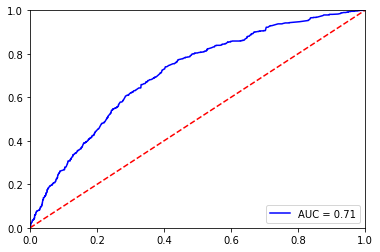

In [241]:
Y_test = y_test
X_test = x_test
X3 = statsmodels.tools.add_constant(X_test)
resu = result_t.predict(X3)#make predictions
fpr, tpr, threshold = roc_curve(Y_test, resu)
rocauc = auc(np.array(fpr), np.array(tpr))#calculate AUC
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

# 4 Scores

In [272]:
p = 20 / math.log(2)

### Based on the coef of the logistic regression, we define the coe list like this

In [273]:
coe = [1.2124,0.4430,-0.2655, 0.4436,-1.1205,1.0444,2.0624,1.4121,0.0831,2.1622]

In [274]:
#Define the function to get score of each predicator
def get_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores

### Get score of each predicator and print them out

In [289]:
score_v1 = get_score(coe[0],woe[0],p)

In [290]:
score_v1

[-11.0, -14.0, 20.0, 2.0, 23.0]

In [291]:
score_v2 = get_score(coe[1],woe[1],p)

In [292]:
score_v2

[-7.0, 1.0, -4.0, 4.0, -12.0]

In [293]:
score_v3 = get_score(coe[2],woe[2],p)

In [294]:
score_v3

[-1.0, 5.0, -3.0, 3.0, -2.0]

In [295]:
score_v4 = get_score(coe[3],woe[3],p)

In [296]:
score_v4

[0.0, 2.0, 4.0, -10.0, 6.0]

In [297]:
score_v5 = get_score(coe[4],woe[4],p)

In [298]:
score_v5

[-21.0, -5.0, 10.0, 13.0, 26.0]

In [299]:
score_v6 = get_score(coe[5],woe[5],p)

In [300]:
score_v6

[-14.0, -23.0, -1.0, 13.0, -24.0]

In [301]:
score_v7 = get_score(coe[6],woe[6],p)

In [302]:
score_v7

[-16.0, 33.0, 21.0, nan, nan]

In [306]:
score_Business_channel = get_score(coe[7],woe[9],p)

In [307]:
score_Business_channel

[-7.0, 31.0, -48.0, nan, nan]

In [308]:
score_FICO_score = get_score(coe[8],woe[10],p)

In [309]:
score_FICO_score

[4.0, 2.0, -0.0, -3.0, -6.0]

In [310]:
score_Age = get_score(coe[9],woe[13],p)

In [311]:
score_Age

[47.0, 26.0, 19.0, 14.0, 3.0, -26.0, -39.0, -48.0, -56.0]